# Cart Pole - Batch Training

![title](cart_pole_pic.png)

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

# Load Packages

In [1]:
import swat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import time
import gym

# Make Environment

In [2]:
env = gym.make('CartPole-v0')

In [3]:
#DocString
?env.env

In [4]:
# Env Actions
directions = {"Left":0,"Right":1}
env.action_space

Discrete(2)

In [5]:
# Env Observation
obs = {"CartPosition":0,"CartVelocity":1,"PoleAngle":2,"PoleAngularVelocity":3}
env.observation_space

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)

In [6]:
# Env Start
# All observations are assigned a uniform random value in [-0.05..0.05]
env.reset()

array([-0.04925397,  0.00307197,  0.00646466,  0.02943692])

# Create Data

In [7]:
data = []
episodes = 1000
for i in range(episodes):
    done = False
    state = env.reset()
    while done!=True:
        action = env.action_space.sample()
        next_state, reward, done, _ = env.step(action)
        data.append( np.concatenate((state, next_state, [action, reward], [done*1])).tolist() )
        state = next_state

In [8]:
df = pd.DataFrame(data)
labels = ['cart_position', 'cart_velocity', 'pole_angle', 'pole_velocity',
          'next_cart_position', 'next_cart_velocity', 'next_pole_angle', 'next_pole_velocity', 
          'action', 'reward', 'done']
df.columns = labels
print(df.shape)
df.head()

(22513, 11)


,cart_position,cart_velocity,pole_angle,pole_velocity,next_cart_position,next_cart_velocity,next_pole_angle,next_pole_velocity,action,reward,done
0,0.042032,0.007649,-0.049808,0.015723,0.042185,0.203449,-0.049493,-0.292250,1.0,1.0,0.0
1,0.042185,0.203449,-0.049493,-0.292250,0.046254,0.009066,-0.055338,-0.015578,0.0,1.0,0.0
2,0.046254,0.009066,-0.055338,-0.015578,0.046436,0.204936,-0.055650,-0.325195,1.0,1.0,0.0
3,0.046436,0.204936,-0.055650,-0.325195,0.050534,0.400804,-0.062154,-0.634895,1.0,1.0,0.0
4,0.050534,0.400804,-0.062154,-0.634895,0.058550,0.596736,-0.074852,-0.946486,1.0,1.0,0.0


# Connect to CAS

In [9]:
conn = swat.CAS("server", 30571, "student", "Metadata0")

# Upload Data to CAS

In [10]:
conn.upload(df, casOut = 'cart_pole_data')
display(conn.table.tableInfo())
conn.table.fetch("cart_pole_data")

NOTE: Cloud Analytic Services made the uploaded file available as table CART_POLE_DATA in caslib CASUSER(student).
NOTE: The table CART_POLE_DATA has been created in caslib CASUSER(student) from binary data uploaded to Cloud Analytic Services.


,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CART_POLE_DATA,22513,11,0,utf-8,2024-08-30T16:36:20+00:00,2024-08-30T16:36:20+00:00,2024-08-30T16:36:20+00:00,UTF8,2.040655e+09,...,0,0,0,,,0,student,,2024-08-30T16:36:20+00:00,2.040655e+09


,cart_position,cart_velocity,pole_angle,pole_velocity,next_cart_position,next_cart_velocity,next_pole_angle,next_pole_velocity,action,reward,done
0,0.042032,0.007649,-0.049808,0.015723,0.042185,0.203449,-0.049493,-0.292250,1.0,1.0,0.0
1,0.042185,0.203449,-0.049493,-0.292250,0.046254,0.009066,-0.055338,-0.015578,0.0,1.0,0.0
2,0.046254,0.009066,-0.055338,-0.015578,0.046436,0.204936,-0.055650,-0.325195,1.0,1.0,0.0
3,0.046436,0.204936,-0.055650,-0.325195,0.050534,0.400804,-0.062154,-0.634895,1.0,1.0,0.0
4,0.050534,0.400804,-0.062154,-0.634895,0.058550,0.596736,-0.074852,-0.946486,1.0,1.0,0.0
5,0.058550,0.596736,-0.074852,-0.946486,0.070485,0.792782,-0.093781,-1.261717,1.0,1.0,0.0
6,0.070485,0.792782,-0.093781,-1.261717,0.086341,0.988969,-0.119016,-1.582237,1.0,1.0,0.0
7,0.086341,0.988969,-0.119016,-1.582237,0.106120,1.185290,-0.150660,-1.909542,1.0,1.0,0.0
8,0.106120,1.185290,-0.150660,-1.909542,0.129826,1.381682,-0.188851,-2.244920,1.0,1.0,0.0
9,0.129826,1.381682,-0.188851,-2.244920,0.157460,1.578019,-0.233750,-2.589382,1.0,1.0,1.0


# Create SAS RL Environment URL

In [11]:
cmd_data = subprocess.check_output(['ipconfig','/all']).decode('utf-8').split('\n')
ip_data = [item for item in cmd_data if "IPv4 Address" in item]
computer_id = ip_data[0].split(": ")[1].split("(")[0]
sasrl_env_port = "10200"
sasrl_env_url = computer_id + ":" + sasrl_env_port

# Load the RL Action Set

In [12]:
conn.loadactionset('reinforcementLearn')

NOTE: Added action set 'reinforcementLearn'.


[actionset]

 'reinforcementLearn'

+ Elapsed: 0.272s, user: 0.679s, sys: 1.09s, mem: 0.22mb

# Train the Agent - Deep Q Networks - Batch Training

In [13]:
results = conn.reinforcementLearn.rlTrainFqn(
     
    # RL Arguments
    QModel = [{'type':'FC', 'n':100, 'act':'RELU'}],
    optimizer=dict(method='ADAM', miniBatchSize=128, lr=0.001),
    gamma = 0.99,
    states = [['cart_position', 'next_cart_position'],
            ['cart_velocity', 'next_cart_velocity'],
            ['pole_angle', 'next_pole_angle'],
            ['pole_velocity', 'next_pole_velocity']],
    rewardVar = 'reward',
    actionVar = 'action',
    doneVar = 'done',
    numEpochs = 100,
    targetUpdateInterval = 200,
     
    # Other Arguments
    table='cart_pole_data',
    modelOut = dict(name='fqn_weights', replace=True),
    seed = 802
     
)

         Iteration=        0 AvgQValue= -0.05 AvgTarget=1.0352 AvgLoss=1.1944
         Iteration=      176 AvgQValue=1.0115 AvgTarget=1.0271 AvgLoss=0.0027
         Iteration=      352 AvgQValue= 1.983 AvgTarget=2.0124 AvgLoss=0.0247
         Iteration=      528 AvgQValue=2.9407 AvgTarget=2.9062 AvgLoss=0.1493
         Iteration=      704 AvgQValue=3.8154 AvgTarget=3.8177 AvgLoss= 0.184
         Iteration=      880 AvgQValue=4.6046 AvgTarget=4.6165 AvgLoss=0.2606
         Iteration=     1056 AvgQValue=5.6595 AvgTarget=5.6941 AvgLoss= 0.036
         Iteration=     1232 AvgQValue=5.9704 AvgTarget=6.1489 AvgLoss=0.5482
         Iteration=     1408 AvgQValue=6.6852 AvgTarget= 6.916 AvgLoss= 0.669
         Iteration=     1584 AvgQValue=6.9319 AvgTarget=6.8623 AvgLoss=0.4665
         Iteration=     1760 AvgQValue=7.7339 AvgTarget=7.7809 AvgLoss=0.5437
         Iteration=     1936 AvgQValue=8.5501 AvgTarget=8.4696 AvgLoss=0.9445
         Iteration=     2112 AvgQValue=9.1745 AvgTarget=9.2841 A

In [14]:
results['FinalResult']

,Description,Value
0,Average QValue,96.036325
1,Average Target Value,97.612990


In [15]:
results['ModelInfo']

,Property,Value
0,Number of State Variables,4
1,Number of Actions,2
2,Algorithm,FQN
3,Optimizer,ADAM


In [16]:
results['OptIterHistory']

,Iteration,AvgQValue,AvgTarget,AvgLoss
0,0,-0.050151,1.035154,1.194425
1,176,1.011517,1.027077,0.002705
2,352,1.983032,2.012361,0.024695
3,528,2.940681,2.906203,0.149348
4,704,3.815357,3.817652,0.184012
...,...,...,...,...
95,16720,90.031047,89.997731,36.796358
96,16896,91.645033,90.867644,80.017339
97,17072,90.854720,90.829604,98.649830
98,17248,89.731250,90.033116,32.527973


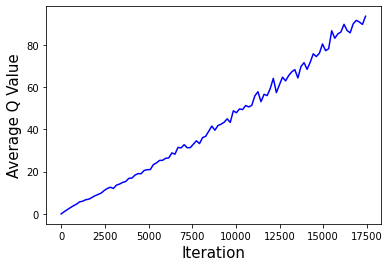

In [17]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['AvgQValue'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Q Value", fontsize=15)
plt.show()

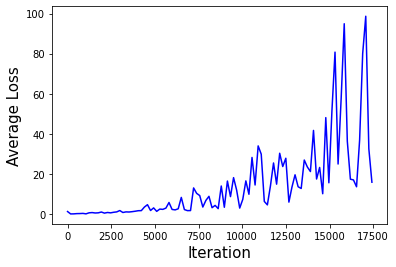

In [18]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['AvgLoss'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Loss", fontsize=15)
plt.show()

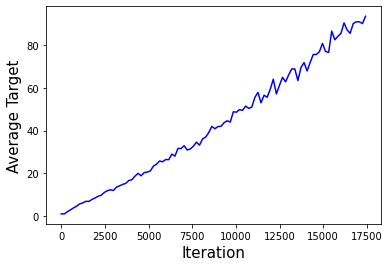

In [19]:
plt.plot(results['OptIterHistory']['Iteration'],results['OptIterHistory']['AvgTarget'], color="blue")
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Average Target", fontsize=15)
plt.show()

# Score the Model

In [20]:
conn.reinforcementLearn.rlScore(
    environment=dict(type='remote', url=sasrl_env_url, name='CartPole-v0', 
                     render=True, renderFreq=10, renderSleep=0, seed=123),
    model='fqn_weights',
    numEpisodes=1,
    logFreq=1,
    casout=dict(name='scored_table', replace=True)
)

         Episode=        1 Step=        1 LastReward=     0 AverageReward=     1
         Episode=        1 Step=        2 LastReward=     0 AverageReward=     2
         Episode=        1 Step=        3 LastReward=     0 AverageReward=     3
         Episode=        1 Step=        4 LastReward=     0 AverageReward=     4
         Episode=        1 Step=        5 LastReward=     0 AverageReward=     5
         Episode=        1 Step=        6 LastReward=     0 AverageReward=     6
         Episode=        1 Step=        7 LastReward=     0 AverageReward=     7
         Episode=        1 Step=        8 LastReward=     0 AverageReward=     8
         Episode=        1 Step=        9 LastReward=     0 AverageReward=     9
         Episode=        1 Step=       10 LastReward=     0 AverageReward=    10
         Episode=        1 Step=       11 LastReward=     0 AverageReward=    11
         Episode=        1 Step=       12 LastReward=     0 AverageReward=    12
         Episode=        1 S

,Property,Value
0,Number of State Variables,4
1,Number of Actions,2
2,Algorithm,FQN
3,Optimizer,ADAM


# Download Final Test

In [21]:
scored_table = conn.CASTable(name = "scored_table")
df = scored_table.to_frame()
df

,_Step_,_Episode_,_State_cart_position,_State_cart_velocity,_State_pole_angle,_State_pole_velocity,_Action_,_Reward_,_Done_
0,0.0,1.0,0.020788,-0.013012,-0.020989,-0.039353,0.0,1.0,0.0
1,1.0,1.0,0.020527,-0.207827,-0.021776,0.246635,0.0,1.0,0.0
2,2.0,1.0,0.016371,-0.402631,-0.016844,0.532370,1.0,1.0,0.0
3,3.0,1.0,0.008318,-0.207277,-0.006196,0.234428,0.0,1.0,0.0
4,4.0,1.0,0.004173,-0.402310,-0.001508,0.525150,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,195.0,1.0,-0.323509,-0.185496,-0.037241,-0.246197,0.0,1.0,0.0
196,196.0,1.0,-0.327218,-0.380067,-0.042165,0.034510,0.0,1.0,0.0
197,197.0,1.0,-0.334820,-0.574560,-0.041475,0.313597,1.0,1.0,0.0
198,198.0,1.0,-0.346311,-0.378873,-0.035203,0.008128,1.0,1.0,0.0


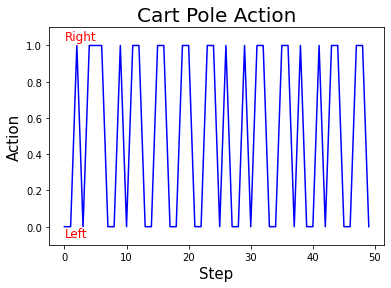

In [22]:
plt.plot(df["_Action_"][:50], color="blue")
plt.title("Cart Pole Action", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Action", fontsize=15)
plt.ylim(-0.1,1.1)
plt.text(0,-0.06,"Left", color="red", fontsize=12)
plt.text(0,1.03,"Right", color="red", fontsize=12)
plt.show()

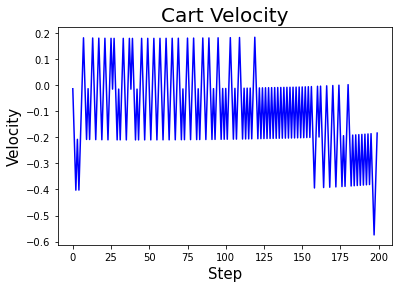

In [23]:
plt.plot(df["_State_cart_velocity"], color="blue")
plt.title("Cart Velocity", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Velocity", fontsize=15)
plt.show()

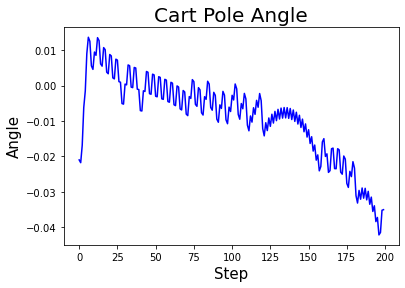

In [24]:
plt.plot(df["_State_pole_angle"], color="blue")
plt.title("Cart Pole Angle", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Angle", fontsize=15)
plt.show()

# End the Session

In [25]:
conn.session.endSession()

+ Elapsed: 0.000366s, user: 0.00033s, sys: 1e-05s, mem: 0.203mb